### Intro to Time Series and Machine Learning
Time Series make complex data more easy to understand and work with

Label - you know the outcome based on historical data from which the model can learn

Classification 
- binary - 1 (yes) / 0 (no)
- Multi Class - usual object (recogntion/classification)
- Supervised Learning - Has label and data
Many features - 1 target variable
- Unserpvised Learning - Have data but no label
No leabes and no target variable that a model can learn from

Ground Truth
- distributations
Applications
- Clustering
- Anomoly Detection

Example for Anomoly Detection
- Gaussion Mixture Models


### Time Sines Decomposition
Signal Decomoses Into:
- Tt - trend component at time t
The trend of the data
- Ct - cyclical component at time t
The period of time
- St - Sesonal componenet at time t
Occurs at fixed or known period
- It - Irregular component (noise) at time t
Respresent the indivuals or the remained or the time series after the other components have been removed

### Hodrick-Prescot Filter
a filter / tool to seperate time series data into two parts
- Growth componenet (trend)
- Cyclical Component

Assumption

YE = Yg * Yc
ln(Yt) = ln(Yg * Yc)
Yt = Yg + Yc

Exponenctially Weighted Moving Average (EWMA)

Traditional Moving Average - equal weights for all data points
Exponetially Weighted Moving Average - data points closer to current point have more weight than old data points
- half life determines the decomostion of weight compared to time

### Auto Correlation
How closely are the current values correlated with past values
- if perfectly random does not depend on what just happend
- if not perfectly random does depend of what just happened

Autocorrelation of a gaussian process
- shape is the Delta Function

In [2]:
import pandas as pd
import numpy as np
!ls

Class 10.1.1.ipynb liquor_sales.csv


### Activity 1

In [8]:
liquor_sales_df = pd.read_csv("liquor_sales.csv", index_col="datetime", parse_dates=True,infer_datetime_format=True)
liquor_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 336 entries, 1980-01-01 to 2007-12-01
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   month         336 non-null    int64
 1   liquor_sales  336 non-null    int64
dtypes: int64(2)
memory usage: 7.9 KB


<AxesSubplot:xlabel='datetime'>

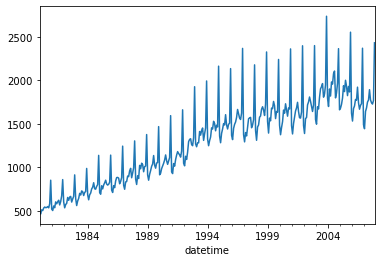

In [12]:
liquor_sales_df['liquor_sales'].plot()

In [13]:
# Stationary Process
# Cyclostatioary Process

In [15]:
liquor_sales_df.loc['1980']

,month,liquor_sales
datetime,,
1980-01-01,1,480
1980-02-01,2,467
1980-03-01,3,514
1980-04-01,4,505
1980-05-01,5,534
1980-06-01,6,546
1980-07-01,7,539
1980-08-01,8,541
1980-09-01,9,551


In [17]:
liquor_sales_df.loc['October 1, 1988']

month             10
liquor_sales    1010
Name: 1988-10-01 00:00:00, dtype: int64

In [18]:
liquor_sales_df.loc['1980-10-01']

month            10
liquor_sales    537
Name: 1980-10-01 00:00:00, dtype: int64

In [20]:
# resample A = Annual
liquor_sales_df.resample('A').mean().head()

,month,liquor_sales
datetime,,
1980-12-31,6.5,554.333333
1981-12-31,6.5,604.833333
1982-12-31,6.5,644.916667
1983-12-31,6.5,701.000000
1984-12-31,6.5,774.500000


In [23]:
help(liquor_sales_df.resample('A'))

Help on DatetimeIndexResampler in module pandas.core.resample object:

class DatetimeIndexResampler(Resampler)
 |  DatetimeIndexResampler(*args, **kwds)
 |  
 |  Class for resampling datetimelike data, a groupby-like operation.
 |  See aggregate, transform, and apply functions on this object.
 |  
 |  It's easiest to use obj.resample(...) to use Resampler.
 |  
 |  Parameters
 |  ----------
 |  obj : Series or DataFrame
 |  groupby : TimeGrouper
 |  axis : int, default 0
 |  kind : str or None
 |      'period', 'timestamp' to override default index treatment
 |  
 |  Returns
 |  -------
 |  a Resampler of the appropriate type
 |  
 |  Notes
 |  -----
 |  After resampling, see aggregate, apply, and transform functions.
 |  
 |  Method resolution order:
 |      DatetimeIndexResampler
 |      Resampler
 |      pandas.core.groupby.groupby.BaseGroupBy
 |      pandas.core.base.PandasObject
 |      pandas.core.accessor.DirNamesMixin
 |      pandas.core.base.SelectionMixin
 |      typing.Gener

In [25]:
liquor_sales_df.index.year

Int64Index([1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980,
            ...
            2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007],
           dtype='int64', name='datetime', length=336)

In [26]:
liquor_sales_df.index.dayofweek

Int64Index([1, 4, 5, 1, 3, 6, 1, 4, 0, 2,
            ...
            3, 6, 1, 4, 6, 2, 5, 0, 3, 5],
           dtype='int64', name='datetime', length=336)

### Activity 2

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [29]:
decomposed_df = seasonal_decompose(liquor_sales_df['liquor_sales'], model = 'multiplicative')

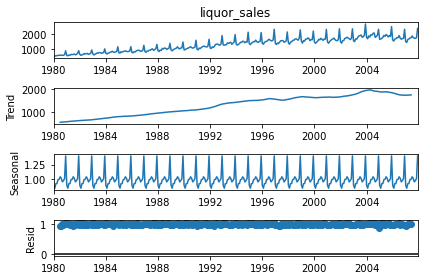

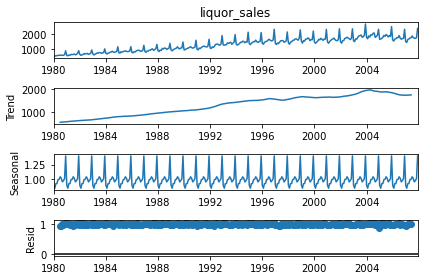

In [30]:
decomposed_df.plot()

In [31]:
decomposed_df = seasonal_decompose(liquor_sales_df['liquor_sales'], model = 'additive')

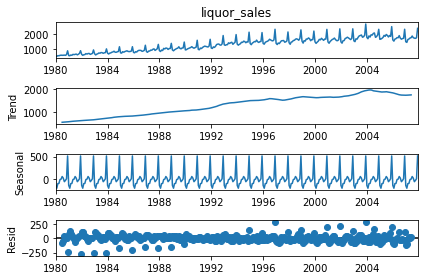

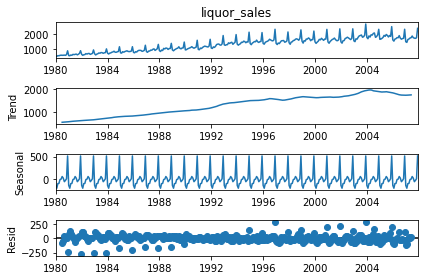

In [32]:
decomposed_df.plot()

In [34]:
IVV_df = pd.read_csv("IVV.csv", index_col="date", parse_dates=True,infer_datetime_format=True)
IVV_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 502 entries, 2017-01-03 to 2018-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    502 non-null    float64
 1   high    502 non-null    float64
 2   low     502 non-null    float64
 3   close   502 non-null    float64
 4   volume  502 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 23.5 KB


In [36]:
IVV_df.head()

,open,high,low,close,volume
date,,,,,
2017-01-03,226.40,227.20,225.24,226.58,6396573
2017-01-04,226.96,228.11,226.95,227.95,4099048
2017-01-05,227.63,227.96,226.85,227.74,2970122
2017-01-06,227.91,229.13,227.28,228.64,3110142
2017-01-09,228.27,228.47,227.81,227.90,2360642


<AxesSubplot:xlabel='date'>

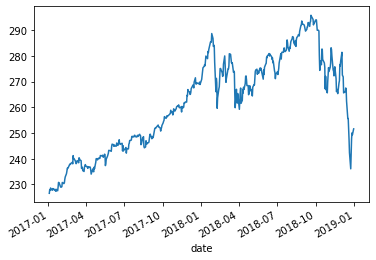

In [35]:
IVV_df.close.plot()

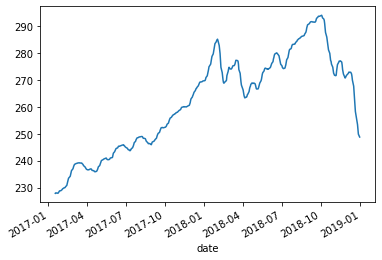

In [40]:
SMA = IVV_df.close.rolling(window=10).mean().plot()

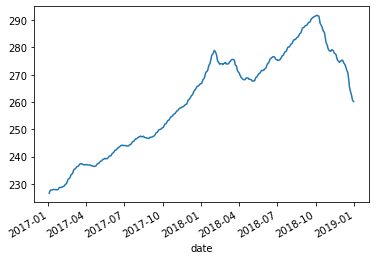

In [47]:
SMA = IVV_df.close.ewm(halflife=10).mean().plot()

In [51]:
import statsmodels.api as sm

In [55]:
noise, trend = sm.tsa.filters.hpfilter(IVV_df['close'])

<AxesSubplot:xlabel='date'>

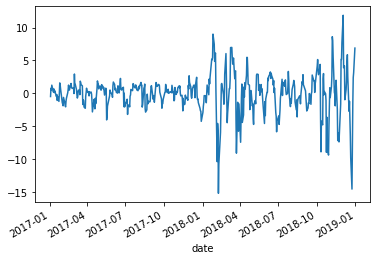

In [56]:
noise.plot()

<AxesSubplot:xlabel='date'>

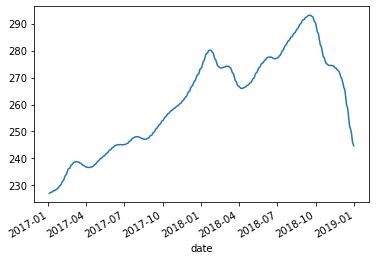

In [57]:
trend.plot()